==========================values of x=====================
[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33

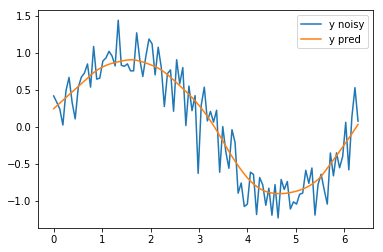

In [5]:
from math import ceil, pi
import numpy as np
from scipy import linalg


def lowess(x, y, f = 2./3., iter=3):
    n = len(x)
    r = ceil(f*n)
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    
    w = np.clip(np.abs((x[:,None] - x[None,:])/h),0.0,1.0)
    w = (1 - w**3)**3
    
    yest, delta = np.zeros(n), np.ones(n)
    
    for iteration in range(iter):
        for i in range(n):
            weights = delta*w[:,i]
            
            b = np.array([np.sum(weights*y), np.sum(weights*y*x)])
            
            A = np.array([[np.sum(weights), np.sum(weights*x)], [np.sum(weights*x), np.sum(weights*x*x)]])
            
            beta = linalg.solve(A,b)
            
            yest[i] = beta[0] + beta[1]*x[i]
    
        residual = y - yest
        s = np.median(np.abs(residual))
        delta = np.clip(residual / (6.0 * s), -1, 1)
        delta = (1 - delta**2)**2
    
    return yest

if __name__ == '__main__':
    n = 100
    x = np.linspace(0, 2 * pi, n)
    print("==========================values of x=====================")
    print(x)
    y = np.sin(x) + 0.3*np.random.randn(n)
    print("================================Values of y===================")
    print(y)
    f = 0.25
    yest = lowess(x, y, f=f, iter=3)

    import pylab as pl
    pl.clf()
    pl.plot(x, y, label='y noisy')
    pl.plot(x, yest, label='y pred')
    pl.legend()
    pl.show()